In [1]:
from models.SwinUnet.networks.vision_transformer_temporal import SwinUnet

class Config:
    class DATA:
        IMG_SIZE = 224 
    
    class MODEL:
        DROP_RATE = 0.0  
        DROP_PATH_RATE = 0.2
        LABEL_SMOOTHING = 0.1
        NAME = 'swin_tiny_patch4_window7_224'
        PRETRAIN_CKPT = 'models/SwinUnet/networks/swin_tiny_patch4_window7_224.pth'
        
        class SWIN:
            PATCH_SIZE = 4 
            IN_CHANS = 7  
            EMBED_DIM = 96  
            DEPTHS = [2, 2, 2, 2]  
            NUM_HEADS = [3, 6, 12, 24] 
            WINDOW_SIZE = 7
            MLP_RATIO = 4.0  
            QKV_BIAS = True  
            QK_SCALE = None 
            APE = False
            PATCH_NORM = True

    class TRAIN:
        USE_CHECKPOINT = False

config = Config()
model = SwinUnet(config, num_classes=1)
model.load_from(config)



/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/sl221120/anaconda3/envs/fire_ts/lib/py

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.2;num_classes:1


/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


---final upsample expand_first---
pretrained_path:models/SwinUnet/networks/swin_tiny_patch4_window7_224.pth
---start load pretrained modle of swin encoder---
delete:patch_embed.proj.weight;shape pretrain:torch.Size([768, 1536]);shape model:torch.Size([96, 7, 4, 4])
Number of keys loaded: 216
Number of keys missing: 22
Missing keys: ['patch_embed.proj.weight', 'layers_up.0.expand.weight', 'layers_up.0.norm.weight', 'layers_up.0.norm.bias', 'layers_up.1.upsample.expand.weight', 'layers_up.1.upsample.norm.weight', 'layers_up.1.upsample.norm.bias', 'layers_up.2.upsample.expand.weight', 'layers_up.2.upsample.norm.weight', 'layers_up.2.upsample.norm.bias', 'concat_back_dim.1.weight', 'concat_back_dim.1.bias', 'concat_back_dim.2.weight', 'concat_back_dim.2.bias', 'concat_back_dim.3.weight', 'concat_back_dim.3.bias', 'norm_up.weight', 'norm_up.bias', 'up.expand.weight', 'up.norm.weight', 'up.norm.bias', 'output.weight']
Number of unexpected keys: 155
Unexpected keys: ['head.weight', 'head.bias

In [7]:
import torch
from dataloader.FireSpreadDataModule import FireSpreadDataModule

# Define the necessary parameters
data_dir = '/home/sl221120/scratch/WildfireSpreadTS_HDF5'
batch_size = 32
n_leading_observations = 5
n_leading_observations_test_adjustment = 5  # Adjust based on your requirement
crop_side_length = 128  # Example value, adjust as needed
load_from_hdf5 = True  # Adjust based on your data format
num_workers = 8  # Number of workers for data loading
remove_duplicate_features = False  # Adjust based on your data preprocessing
features_to_keep = [0, 1, 2, 3, 4, 38, 39]
desired_side_length = 224

# Initialize the data module with the defined parameters
data_module = FireSpreadDataModule(
    data_dir=data_dir,
    batch_size=batch_size,
    n_leading_observations=n_leading_observations,
    n_leading_observations_test_adjustment=n_leading_observations_test_adjustment,
    crop_side_length=crop_side_length,
    load_from_hdf5=load_from_hdf5,
    num_workers=num_workers,
    remove_duplicate_features=remove_duplicate_features,
    features_to_keep=features_to_keep,
    is_pad=True,
    return_doy=True,
    
)

# Setup the data module to prepare the datasets
data_module.setup(stage="")

# Get a batch from the training data loader
train_dataloader = data_module.train_dataloader()
for batch in train_dataloader:
    # Break after getting the first batch
    inputs, label, doy = batch
    break

Using the following dataset split:
Train years: [2018, 2019], Val years: [2020], Test years: [2021]


In [8]:
inputs.shape

torch.Size([32, 5, 7, 224, 224])

In [9]:
# Pass the input through the model
output = model(inputs, doy)

# Print the output shape
print("Output shape:", output.shape)

Output shape: torch.Size([32, 1, 224, 224])


In [1]:
from dataloader.FireSpreadDataset import FireSpreadDataset
from dataloader.FireSpreadDataModule import FireSpreadDataModule
from models.SwinUnet.networks.vision_transformer import SwinUnet
import torch 

datamodule = FireSpreadDataModule(
    n_leading_observations=5,  # Replace with actual values
    features_to_keep=[0, 1, 2, 3, 4, 38, 39],
    remove_duplicate_features=True,
    data_fold_id=2,
    data_dir="/home/sl221120/scratch/WildfireSpreadTS_HDF5",
    batch_size=64, 
    n_leading_observations_test_adjustment=5,
    crop_side_length=128, 
    load_from_hdf5=True, 
    num_workers=8
)
n_features = FireSpreadDataset.get_n_features(n_observations=5, features_to_keep=[0, 1, 2, 3, 4, 38, 39],
                                              deduplicate_static_features=True)

/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Config:
    class DATA:
        IMG_SIZE = 224 
    
    class MODEL:
        DROP_RATE = 0.0  
        DROP_PATH_RATE = 0.2
        LABEL_SMOOTHING = 0.1
        NAME = 'swin_tiny_patch4_window7_224'
        PRETRAIN_CKPT = 'models/SwinUnet/networks/swin_tiny_patch4_window7_224.pth'
    

        
        class SWIN:
            PATCH_SIZE = 4 
            IN_CHANS = n_features  
            EMBED_DIM = 96  
            DEPTHS = [2, 2, 2, 2]  
            NUM_HEADS = [3, 6, 12, 24] 
            WINDOW_SIZE = 7
            MLP_RATIO = 4.0  
            QKV_BIAS = True  
            QK_SCALE = None 
            APE = False
            PATCH_NORM = True

    class TRAIN:
        USE_CHECKPOINT = False

config = Config()
model = SwinUnet(config, num_classes=1)
model.load_from(config)


SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.2;num_classes:1


/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


---final upsample expand_first---
pretrained_path:models/SwinUnet/networks/swin_tiny_patch4_window7_224.pth
---start load pretrained modle of swin encoder---
delete:patch_embed.proj.weight;shape pretrain:torch.Size([768, 1536]);shape model:torch.Size([96, 35, 4, 4])
Number of keys loaded: 216
Number of keys missing: 22
Missing keys: ['patch_embed.proj.weight', 'layers_up.0.expand.weight', 'layers_up.0.norm.weight', 'layers_up.0.norm.bias', 'layers_up.1.upsample.expand.weight', 'layers_up.1.upsample.norm.weight', 'layers_up.1.upsample.norm.bias', 'layers_up.2.upsample.expand.weight', 'layers_up.2.upsample.norm.weight', 'layers_up.2.upsample.norm.bias', 'concat_back_dim.1.weight', 'concat_back_dim.1.bias', 'concat_back_dim.2.weight', 'concat_back_dim.2.bias', 'concat_back_dim.3.weight', 'concat_back_dim.3.bias', 'norm_up.weight', 'norm_up.bias', 'up.expand.weight', 'up.norm.weight', 'up.norm.bias', 'output.weight']
Number of unexpected keys: 155
Unexpected keys: ['head.weight', 'head.bia

In [3]:
import matplotlib.pyplot as plt
import os

# Load the saved predictions file
# Unet predictions
unet_file_path = '/home/sl221120/WildfireSpreadTS/lightning_logs/predictions_zg3xkq8k.pt'
unet_fire_masks_combined = torch.load(unet_file_path)
# Extract data
unet_x_af = unet_fire_masks_combined[0]  # Current fire
unet_y_hat = unet_fire_masks_combined[1]  # Predicted next day
unet_y = unet_fire_masks_combined[2]  # True next day
unet_y_binary = (unet_y_hat > 0.5).float()



In [4]:
# SwinUnet predictions
swin_file_path = "/home/sl221120/WildfireSpreadTS/prediction_output.pt"
swin_prediction_output = torch.load(swin_file_path)

swin_x_af = torch.cat(
    list(map(lambda tup: tup[0], swin_prediction_output)), axis=0)
swin_y = torch.cat(list(map(lambda tup: tup[1], swin_prediction_output)), axis=0)
swin_y_hat = torch.cat(
    list(map(lambda tup: tup[2], swin_prediction_output)), axis=0)
swin_fire_masks_combined = torch.cat(
    [swin_x_af.unsqueeze(0), swin_y_hat.unsqueeze(0), swin_y.unsqueeze(0)], axis=0)

swin_x_af = swin_fire_masks_combined[0]  # Current fire
swin_y_hat_swin = swin_fire_masks_combined[1]  # Predicted next day
swin_y = swin_fire_masks_combined[2]  # True next day
swin_y_binary = (swin_y_hat > 0.5).float()

import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt

# Define center crop transformation
center_crop = T.CenterCrop(128)

# Apply center crop to each tensor
x_af_cropped = center_crop(swin_x_af)
y_hat_cropped = center_crop(swin_y_hat)
y_cropped = center_crop(swin_y)

In [5]:
import torch
import matplotlib.pyplot as plt

def plot_preds(x_af, y, y_swin, num_data_points):    
    fire_pixel_counts = torch.sum(y == 1, dim=(1, 2)).cpu().numpy()

    # Get the indices of the top num_data_points with the most fire pixels
    top_indices = fire_pixel_counts.argsort()[-num_data_points:][::-1]

    # Create subplots
    fig, axs = plt.subplots(num_data_points, 3, figsize=(10, num_data_points * 3))

    # Plot each of the selected data points
    for i, idx in enumerate(top_indices):
        # Current fire (x_af)
        axs[i, 0].imshow(x_af[idx].cpu().numpy(), cmap='viridis')
        axs[i, 0].set_title('Current Fire')
        axs[i, 0].axis('off')

        # True next day (y)
        axs[i, 1].imshow(y[idx].cpu().numpy(), cmap='viridis')
        axs[i, 1].set_title('True Next Day')
        axs[i, 1].axis('off')

        # Predicted next day by SwinUnet (y_swin)
        y_swin_binary = (y_swin[idx] > 0.5).float()
        axs[i, 2].imshow(y_swin_binary.cpu().numpy(), cmap='viridis')
        axs[i, 2].set_title('Predicted Next (Swin)')
        axs[i, 2].axis('off')


    # Adjust layout
    plt.tight_layout()
    plt.show()

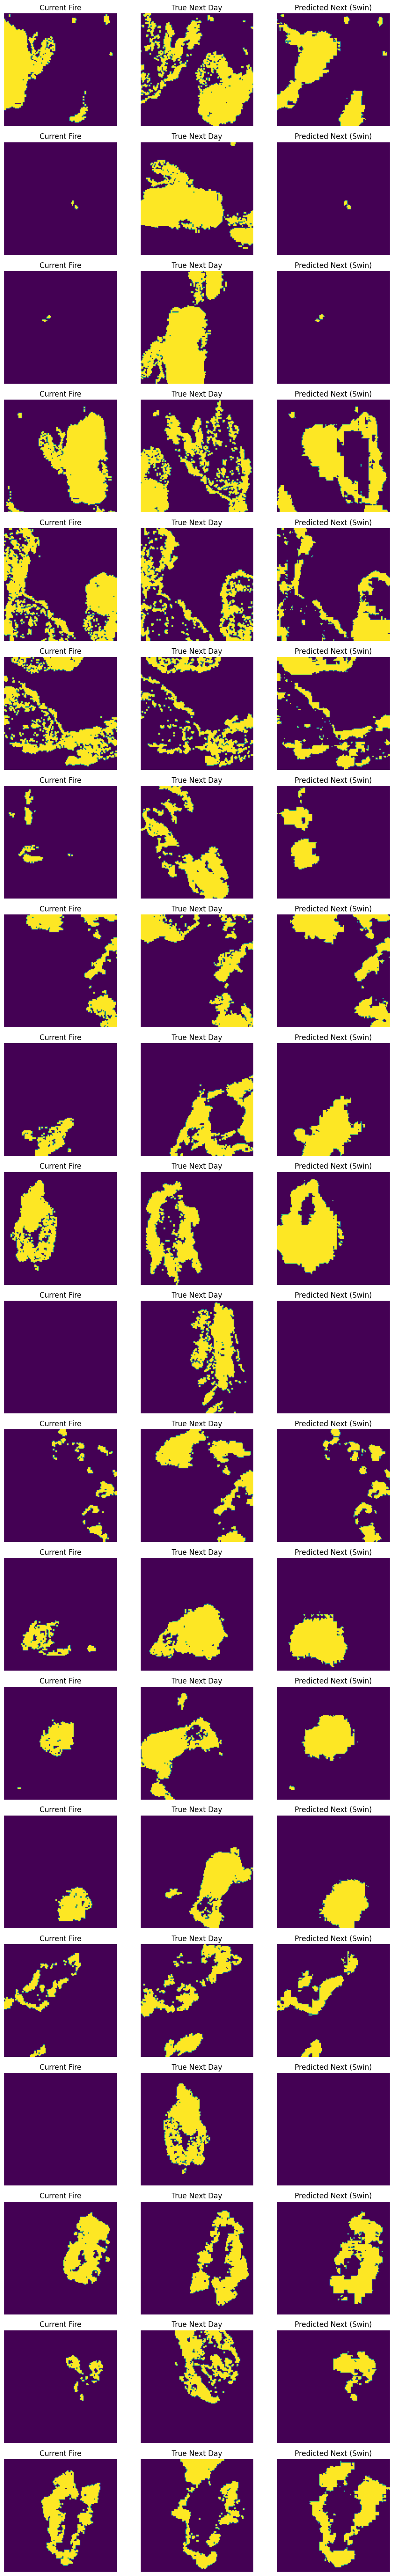

In [89]:
plot_preds(x_af_cropped, y_cropped, y_hat_cropped, num_data_points=20)


In [6]:
import torch
import matplotlib.pyplot as plt

def plot_and_save_preds(x_af, y, y_swin, num_data_points, output_dir="output_images"):
    import os
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    fire_pixel_counts = torch.sum(y == 1, dim=(1, 2)).cpu().numpy()

    # Get the indices of the top num_data_points with the most fire pixels
    top_indices = fire_pixel_counts.argsort()[-num_data_points:][::-1]

    # Plot and save each of the selected data points as a separate figure
    for i, idx in enumerate(top_indices):
        # Create a new figure for each row
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))

        # Current fire (x_af)
        axs[0].imshow(x_af[idx].cpu().numpy(), cmap='viridis')
        axs[0].set_title('Current Fire')
        axs[0].axis('off')

        # True next day (y)
        axs[1].imshow(y[idx].cpu().numpy(), cmap='viridis')
        axs[1].set_title('True Next Day')
        axs[1].axis('off')

        # Predicted next day by SwinUnet (y_swin)
        y_swin_binary = (y_swin[idx] > 0.5).float()
        axs[2].imshow(y_swin_binary.cpu().numpy(), cmap='viridis')
        axs[2].set_title('Predicted Next (Swin)')
        axs[2].axis('off')

        # Save the figure to disk
        plt.tight_layout()
        fig_path = os.path.join(output_dir, f"pred_plot_{i + 1}.png")
        plt.savefig(fig_path)
        plt.close(fig)  # Close the figure to free up memory

    print(f"Saved {num_data_points} figures to {output_dir}")


In [7]:
plot_and_save_preds(x_af_cropped, y_cropped, y_hat_cropped, num_data_points=20)

Saved 20 figures to output_images


In [8]:
import torch
import matplotlib.pyplot as plt

def plot_and_save_preds_flip(x_af, y, y_swin, num_data_points, output_dir="output_images_flip"):
    import os
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    fire_pixel_counts = torch.sum(x_af == 1, dim=(1, 2)).cpu().numpy()

    # Get the indices of the top num_data_points with the most fire pixels
    top_indices = fire_pixel_counts.argsort()[-num_data_points:][::-1]

    # Plot and save each of the selected data points as a separate figure
    for i, idx in enumerate(top_indices):
        # Create a new figure for each row
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))

        # Current fire (x_af)
        axs[0].imshow(x_af[idx].cpu().numpy(), cmap='viridis')
        axs[0].set_title('Current Fire')
        axs[0].axis('off')

        # True next day (y)
        axs[1].imshow(y[idx].cpu().numpy(), cmap='viridis')
        axs[1].set_title('True Next Day')
        axs[1].axis('off')

        # Predicted next day by SwinUnet (y_swin)
        y_swin_binary = (y_swin[idx] > 0.5).float()
        axs[2].imshow(y_swin_binary.cpu().numpy(), cmap='viridis')
        axs[2].set_title('Predicted Next (Swin)')
        axs[2].axis('off')

        # Save the figure to disk
        plt.tight_layout()
        fig_path = os.path.join(output_dir, f"pred_plot_{i + 1}.png")
        plt.savefig(fig_path)
        plt.close(fig)  # Close the figure to free up memory

    print(f"Saved {num_data_points} figures to {output_dir}")


In [9]:
plot_and_save_preds_flip(x_af_cropped, y_cropped, y_hat_cropped, num_data_points=20)

Saved 20 figures to output_images_flip


In [69]:
from sklearn.metrics import average_precision_score
import torch

def compute_mean_ap(y_true, y_swin, y_unet):
    # Flatten the tensors to 1D arrays
    y_true_flat = y_true.cpu().numpy().flatten()
    y_swin_flat = y_swin.cpu().numpy().flatten()
    y_unet_flat = y_unet.cpu().numpy().flatten()

    # Compute mean average precision for SwinUnet
    ap_swin = average_precision_score(y_true_flat, y_swin_flat)

    # Compute mean average precision for UNet
    ap_unet = average_precision_score(y_true_flat, y_unet_flat)

    # Print both results
    print(f"Mean Average Precision (SwinUnet): {ap_swin:.4f}")
    print(f"Mean Average Precision (UNet): {ap_unet:.4f}")

    return ap_swin, ap_unet

# Example usage:
compute_mean_ap(y, swin_y_hat_swin, y_hat)


Mean Average Precision (SwinUnet): 0.4725
Mean Average Precision (UNet): 0.4725


(0.4724991083266338, 0.4724991083266338)

In [13]:
from sklearn.metrics import average_precision_score
import torch

def compute_mean_ap(y_true, y_swin):
    # Flatten the tensors to 1D arrays
    y_true_flat = y_true.cpu().numpy().flatten()
    y_swin_flat = y_swin.cpu().numpy().flatten()

    # Compute mean average precision for SwinUnet
    ap_swin = average_precision_score(y_true_flat, y_swin_flat)

    return ap_swin

def filter_images_by_fire_percentage(images, threshold):
    """
    Filters the images based on the percentage of fire pixels.

    Args:
        images (Tensor): Batch of images to filter.
        threshold (float): Percentage threshold (between 0 and 100).

    Returns:
        indices (Tensor): Boolean tensor with indices of images that meet the threshold.
    """
    # Compute the number of fire pixels for each image (fire pixels are assumed to be non-zero)
    fire_pixels = (images > 0).float().sum(dim=(1, 2))  # Assuming 1xHxW tensor for each image
    total_pixels = images.shape[1] * images.shape[2]
    
    # Compute the percentage of fire pixels
    fire_percentage = (fire_pixels / total_pixels) * 100

    # Return a boolean mask of images with fire percentage >= threshold
    return fire_percentage >= threshold

def compute_test_ap_for_subsets(x_af, y_true, y_swin, thresholds):
    results = {}

    for z in thresholds:
        print(f"\nComputing mAP for threshold {z}% of fire pixels:")

        # Subset 1: Where `x_af` (current fire image) has at least Z% fire pixels
        x_af_mask = filter_images_by_fire_percentage(x_af, z)
        y_true_filtered_x_af = y_true[x_af_mask]
        y_swin_filtered_x_af = y_swin[x_af_mask]

        # Compute mAP for SwinUnet and UNet for this subset
        ap_swin_x_af = compute_mean_ap(y_true_filtered_x_af, y_swin_filtered_x_af)
        results[f"x_af >= {z}%"] = {"SwinUnet": ap_swin_x_af}

        print(f"Subset where x_af >= {z}% fire pixels: AP(SwinUnet) = {ap_swin_x_af:.4f}")

        # Subset 2: Where `y_true` (next day image) has at least Z% fire pixels
        y_true_mask = filter_images_by_fire_percentage(y_true, z)
        y_true_filtered_y = y_true[y_true_mask]
        y_swin_filtered_y = y_swin[y_true_mask]

        # Compute mAP for SwinUnet and UNet for this subset
        ap_swin_y = compute_mean_ap(y_true_filtered_y, y_swin_filtered_y)
        results[f"y_true >= {z}%"] = {"SwinUnet": ap_swin_y}

        print(f"Subset where y_true >= {z}% fire pixels: AP(SwinUnet) = {ap_swin_y:.4f}")
    
    return results

# Example usage:
# Assuming x_af, y_true, swin_y_hat_swin, and y_hat are your tensors
thresholds = [5, 10, 15, 20, 25, 30, 40, 50, 75]
results = compute_test_ap_for_subsets(x_af_cropped, y_cropped, y_hat_cropped, thresholds)

# `results` will hold the mAP values for each threshold level and subset



Computing mAP for threshold 5% of fire pixels:
Subset where x_af >= 5% fire pixels: AP(SwinUnet) = 0.5955
Subset where y_true >= 5% fire pixels: AP(SwinUnet) = 0.5409

Computing mAP for threshold 10% of fire pixels:
Subset where x_af >= 10% fire pixels: AP(SwinUnet) = 0.5779
Subset where y_true >= 10% fire pixels: AP(SwinUnet) = 0.5243

Computing mAP for threshold 15% of fire pixels:
Subset where x_af >= 15% fire pixels: AP(SwinUnet) = 0.6171
Subset where y_true >= 15% fire pixels: AP(SwinUnet) = 0.4875

Computing mAP for threshold 20% of fire pixels:
Subset where x_af >= 20% fire pixels: AP(SwinUnet) = 0.5776
Subset where y_true >= 20% fire pixels: AP(SwinUnet) = 0.4762

Computing mAP for threshold 25% of fire pixels:
Subset where x_af >= 25% fire pixels: AP(SwinUnet) = 0.6044
Subset where y_true >= 25% fire pixels: AP(SwinUnet) = 0.4509

Computing mAP for threshold 30% of fire pixels:
Subset where x_af >= 30% fire pixels: AP(SwinUnet) = 0.5975
Subset where y_true >= 30% fire pixels:

IndexError: cannot do a non-empty take from an empty axes.

In [59]:
# Unet predictions
file_path = '/home/sl221120/WildfireSpreadTS/lightning_logs/predictions_zg3xkq8k.pt'
unet_fire_masks_combined = torch.load(file_path)
y_unet = unet_fire_masks_combined[1]

# SwinUnet predictions
file = "/home/sl221120/WildfireSpreadTS/prediction_output.pt"
swin_prediction_output = torch.load(file)
y_swin = torch.cat(list(map(lambda tup: tup[2], swin_prediction_output)), axis=0)

